In [1]:
from diags import Conventional
import numpy as np
import pandas as pd
from filter_df import filter_df
from make_da_plots import make_base_plots, make_wind_base_plots
import importlib
from plot_driver import da_base_plots
import time_series as time_series
from datetime import datetime, timedelta, timezone
import matplotlib.pyplot as plt
import xarray as xr

In [2]:
pd.set_option('display.max_columns', None) # so I can see all columns on the df

# Filter dataframe returned by PyGSI

## Read GSI diag files

In [3]:
#temperature diag files
diag_t_ges_fp = '../example_data/diag_conv_t_ges.2024031812.nc4'
diag_t_anl_fp = '../example_data/diag_conv_t_anl.2024031812.nc4'

#wind diag files
diag_uv_ges_fp = '../example_data/diag_conv_uv_ges.2024031812.nc4'
diag_uv_anl_fp = '../example_data/diag_conv_uv_anl.2024031812.nc4'

In [4]:
#Temperature Diag file
diag_t_ges = Conventional(diag_t_ges_fp)
diag_t_anl = Conventional(diag_t_anl_fp)

#Wind Diag file
diag_uv_ges = Conventional(diag_uv_ges_fp)
diag_uv_anl = Conventional(diag_uv_anl_fp)

## Query data

In [5]:
df_t_ges = diag_t_ges.get_data()
df_t_anl = diag_t_anl.get_data()

df_uv_ges = diag_uv_ges.get_data()
df_uv_anl = diag_uv_anl.get_data()

## Filtering dataframes

### Set filter arguments

In [6]:
station_ids = ['NLOYR3BA']
obs_types = [120, 130]
use = 1
elv_range = (0,20)
p_range = (500,1000)
err_range = (0, 4)


# Lat and lon ranges for colorado
co_lats = (37, 41)
co_lons = (251, 258) #to convert from deg west to deg east (360 - deg west)
# co_lats_z = (38, 41)
# co_lons_z = (255, 258) 

In [7]:
# temp examples
fil_t_dfs = filter_df([df_t_anl, df_t_ges], obs_types= [187], hem='CONUS')
# fil_t_dfs = filter_df([df_t_anl, df_t_ges], lat_range=co_lats,lon_range=co_lons)

df_t_anl_fil = fil_t_dfs[0]
df_t_ges_fil = fil_t_dfs[1]
print(len(df_t_anl_fil))
print(len(df_t_ges_fil))

3016
3016


In [8]:
# wind examples
# fil_uv_dfs = filter_df([df_uv_anl, df_uv_ges], obs_types= [287], hem='CONUS')
# fil_uv_dfs = filter_df([df_uv_anl, df_uv_ges], obs_types= [287], lat_range=co_lats, lon_range=co_lons)
fil_uv_dfs = filter_df([df_uv_anl, df_uv_ges], use = 0)

df_uv_anl_fil = fil_uv_dfs[0]
df_uv_ges_fil = fil_uv_dfs[1]
print(len(df_uv_anl_fil))
print(len(df_uv_ges_fil))

97575
97825


## Testing base plots

### Testing non wind

In [9]:
# make_base_plots([df_t_ges_fil, df_t_anl_fil], diag_t_ges.metadata, save_plots=True)

------------ Temperature Data Assimilation Statistics and Plots ------------


Observation Type: 187

Proportion Assimilated: 0.6790450811386108



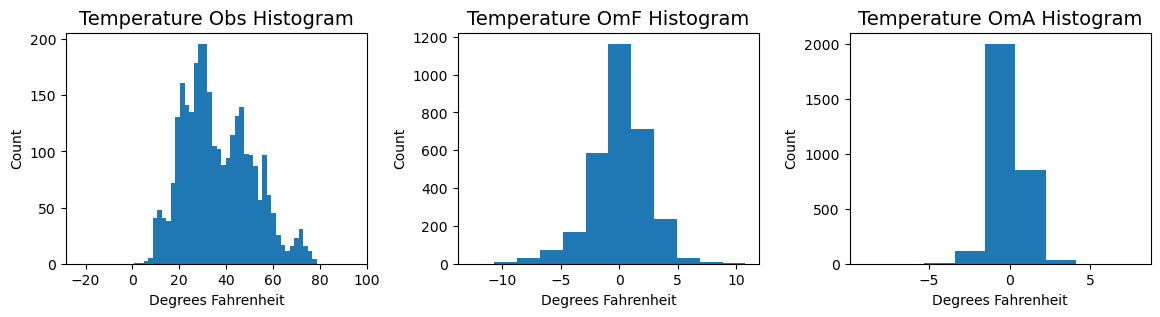

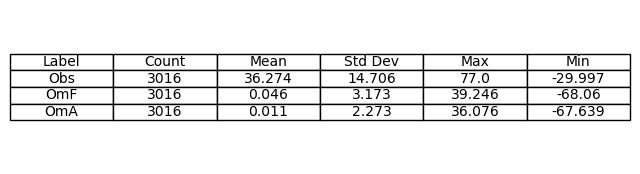

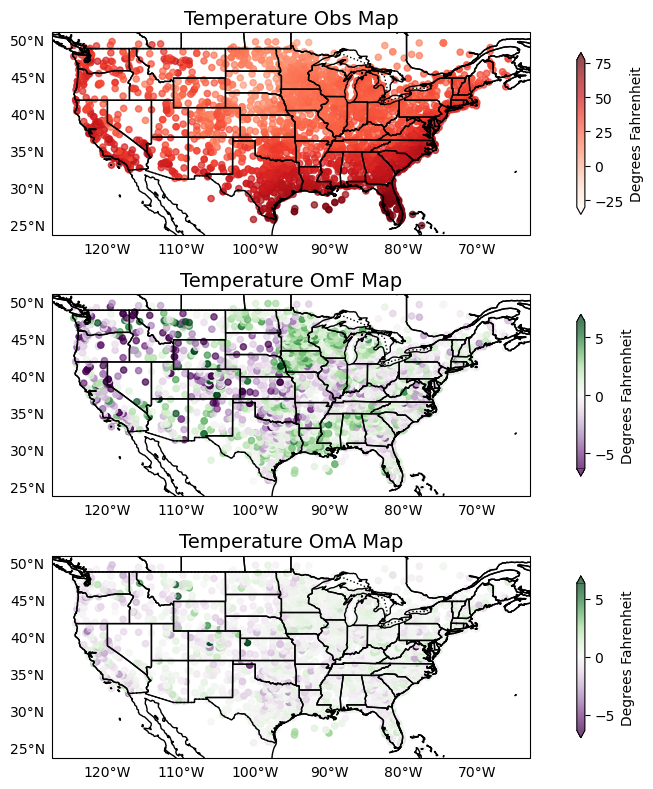

In [10]:
make_base_plots([df_t_ges_fil, df_t_anl_fil], diag_t_ges.metadata)

In [11]:
# map_img = plt.imread('t_2024031812_plots/Temperature_obs_map.png')
# plt.figure(figsize = (20,15))
# plt.imshow(map_img)
# plt.axis('off')
# plt.show()

### Testing wind

In [12]:
# make_wind_base_plots([df_uv_anl_fil, df_uv_ges_fil], diag_uv_ges.metadata, save_plots=True)

------------ Wind Data Assimilation Statistics and Plots ------------




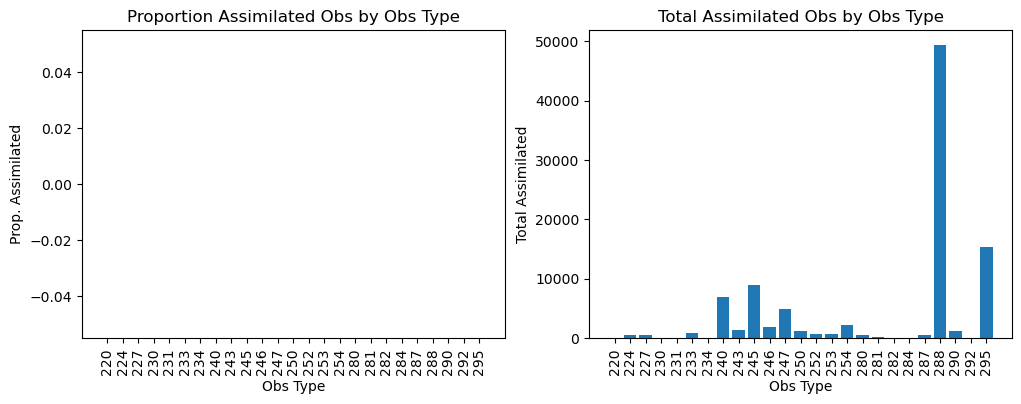

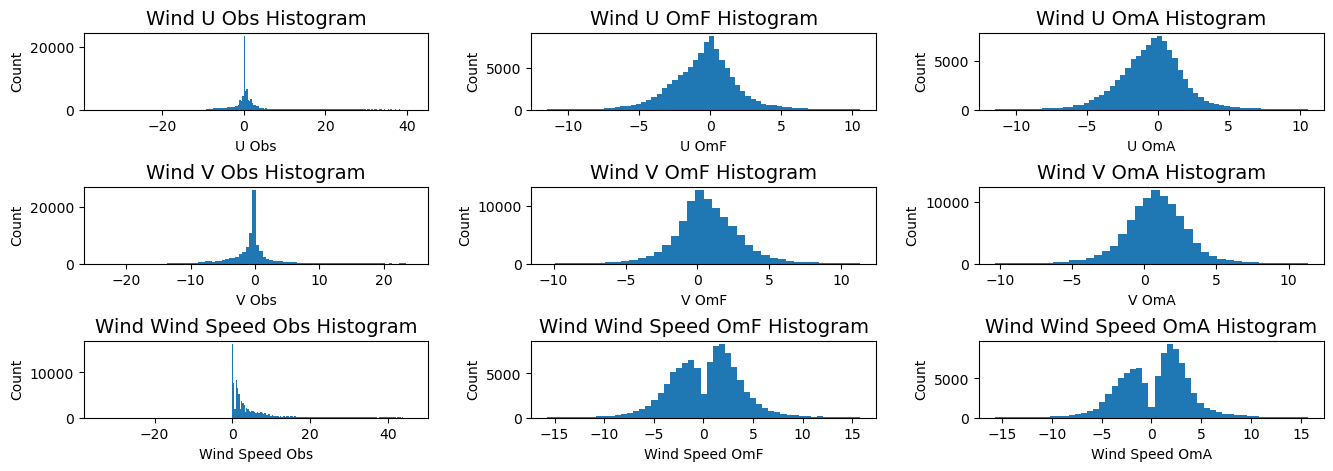

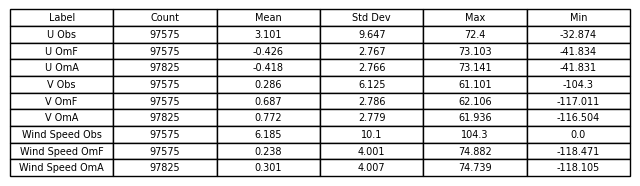

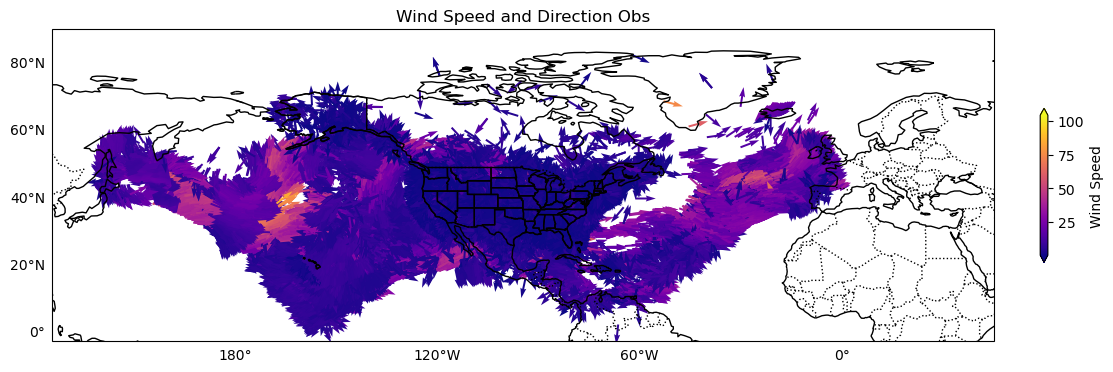

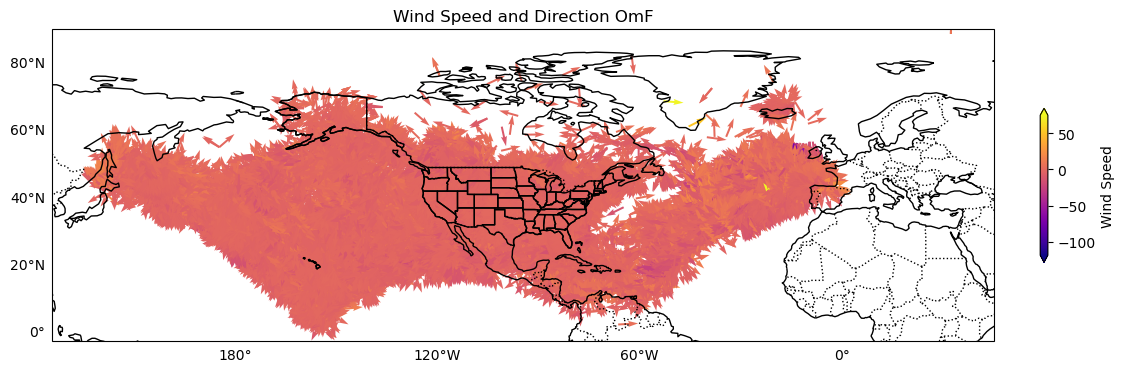

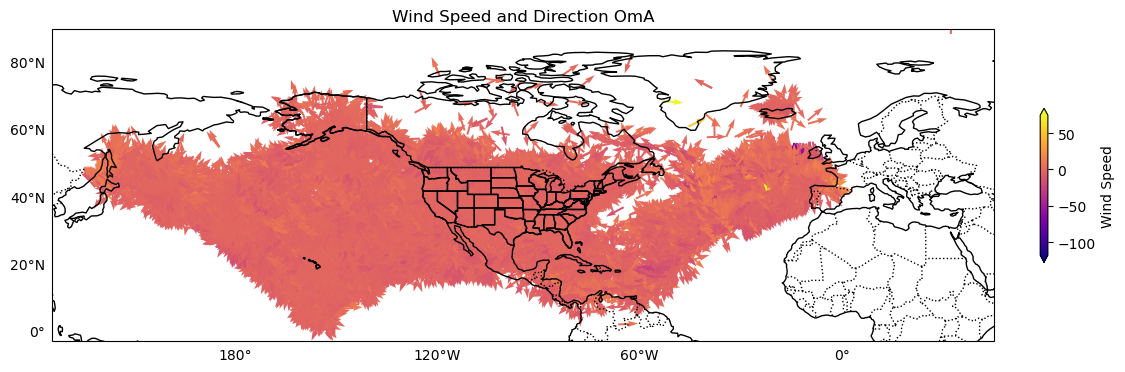

In [13]:
make_wind_base_plots([df_uv_anl_fil, df_uv_ges_fil], diag_uv_ges.metadata)

In [14]:
# map_img = plt.imread('wind_2024031812_plots/wind_speed_direction_Obs_map.png')
# plt.figure(figsize = (15,10))
# plt.imshow(map_img)
# plt.axis('off')
# plt.show()

# Exploring time series plots

In [15]:
# Get the yesterdays date
today = datetime.today()
yesteryesterday = today - timedelta(days=1)

# Format date
date = yesteryesterday.strftime('%Y%m%d')
print(date)

20240716


In [16]:
rrfs_data_fp = "/lfs4/BMC/nrtrr/NCO_dirs/v0.8.8/com/prod/"
rtma_data_fp = "/lfs4/BMC/nrtrr/NCO_dirs/rtma.v0.8.8/com/prod/RTMA_CONUS." + date

## Dataframe for reference

In [17]:
# test_hr = '20'
# test_fp = f"{rtma_data_fp}/{test_hr}/diag_conv_t_anl.{date}{test_hr}.nc4.gz"
# test_df = Conventional(test_fp).get_data()

In [18]:
# station_ids = ['G4CUISJA']
station_ids = None
obs_types = None
rtma_path = '/lfs4/BMC/nrtrr/NCO_dirs/rtma.v0.8.8/com/prod'
rrfs_path = '/lfs4/BMC/nrtrr/NCO_dirs/v0.9.5/com/prod'

# Get a list of strings with all hours of day
var = 't'

# Get the current date and time in UTC
now_utc = datetime.now(timezone.utc)
f_time = now_utc.replace(minute=0, second=0, microsecond=0)
s_time = f_time - timedelta(days=2)
s_time = s_time.replace(hour=0)

date_times = pd.date_range(start=s_time, end=f_time, freq='H')

/var/folders/hn/0plt5sk14l98tdvv43hr35nr0000gn/T/ipykernel_29910/860779328.py:16: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date_times = pd.date_range(start=s_time, end=f_time, freq='H')


In [19]:
time_series.plot_time_series([rrfs_path, rtma_path], models = ['rrfs'],
                             var = var, anl_ges='both', s_time=s_time, f_time=f_time)

Reading rrfs data...


/Users/aidenpape/Desktop/noaa/code/pyDAmonitor/code/time_series.py:45: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date_times = pd.date_range(start=s_time, end=f_time, freq='H')


ValueError: All times for rrfs ges are NaN

## Testing command line plot making function

In [ ]:
# path = '/Users/aidenpape/Desktop/noaa/code/pyDAmonitor/example_data' #aiden's laptop
path = '/lfs5/BMC/wrfruc/aiden.pape/pyDAmonitor/example_data' #jet
model = 'rtma'
date_time = '2024031812'
var = 't'

In [ ]:
da_base_plots(path, model, date_time, var)

------------ Temperature Data Assimilation Statistics and Plots ------------


Obs Statistics: 
n: 95291, mean: 28.884618759155273, std: 32.6507568359375, max: 158.0, min: -114.69999694824219

OmF Statistics: 
n: 95291, mean: 0.13633757829666138, std: 4.3163743019104, max: 121.02835083007812, min: -160.4886932373047

OmA Statistics: 
n: 95291, mean: 0.06685464829206467, std: 4.503620624542236, max: 116.47181701660156, min: -160.66253662109375



/lfs5/BMC/wrfruc/gge/miniconda3/4.6.14/envs/eva/lib/python3.9/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/lfs5/BMC/wrfruc/gge/miniconda3/4.6.14/envs/eva/lib/python3.9/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/lfs5/BMC/wrfruc/gge/miniconda3/4.6.14/envs/eva/lib/python3.9/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_1_states_provinces_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


## Try to read grib files